In [1]:
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
from PIL import Image
!pip install opencv-python
import cv2

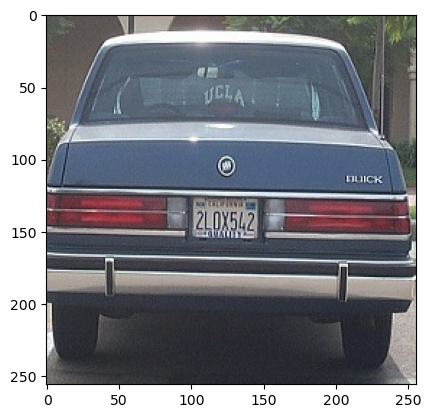

In [2]:
image = plt.imread('car-1.jpg')
shape=image.shape
plt.imshow(image)

In [3]:
# red = vec_img[0, :, 0]
# green = vec_img[0, :, 1]
# blue = vec_img[0, :, 2]
# ch = [red , green, blue]
# red.shape, green.shape, blue.shape

In [4]:
# bis = np.linspace(0, 255, num=11 ,dtype= float)
# bis

In [5]:
def ICV_count(img):
    counter = {}
    for val in img:
        try:
            counter[val] = counter[val] + 1
        except KeyError:
            counter[val] = 1
    
    return counter

In [6]:
def ICV_hist(image,bin_n):
    dic = {}
    channels = ["b","g","r"]
    for ch in range(len(channels)):
        
        vec_img = image.reshape(1,-1,3)
        x = ICV_count(vec_img[0,:,ch])
    
        bis = np.linspace(0, 255, num=bin_n+1 ,dtype= float)
        for i in range(1,len(bis)):
            dic[str(bis[i])]=0
            for j in x.keys():
                if bis[i-1] <= j < bis[i]:
                    dic[str(bis[i])]+=x[j]
        plt.plot(range(len(dic)), list(dic.values()), c = channels[ch])
        
    return dic

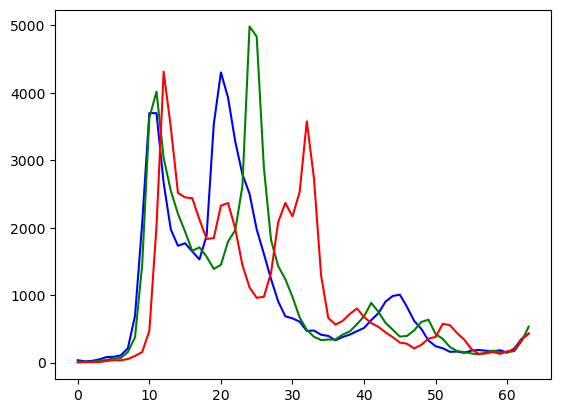

In [7]:
x = ICV_hist(image,64)
# print(x)

In [8]:
def ICV_hist2(image,bin_n):
    dic = {}
    lis = []
    channels = ["b","g","r"]
    for ch in range(len(channels)):
        
        vec_img = image.reshape(1,-1,3)
        x = ICV_count(vec_img[0,:,ch])
    
        bis = np.linspace(0, 255, num=bin_n+1 ,dtype= float)
        for i in range(1,len(bis)):
            dic[str(bis[i])]=0
            for j in x.keys():
                if bis[i-1] <= j < bis[i]:
                    dic[str(bis[i])]+=x[j]
                    
        # plt.plot(range(len(dic)), list(dic.values()), c = channels[ch])
        lis = np.array([i for i in dic.values()])
        
    return lis

In [9]:
cap = cv2.VideoCapture('DatasetB.avi')
# length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# print(length)

count = 0
frames = []

while(cap.isOpened()):
      
    ret,frame = cap.read()

    if ret== False:
        break
    frames.append(frame)
    count +=1 
frames = np.array(frames)

print(count) #Prints the number of frames in the video

    
cap.release()

348


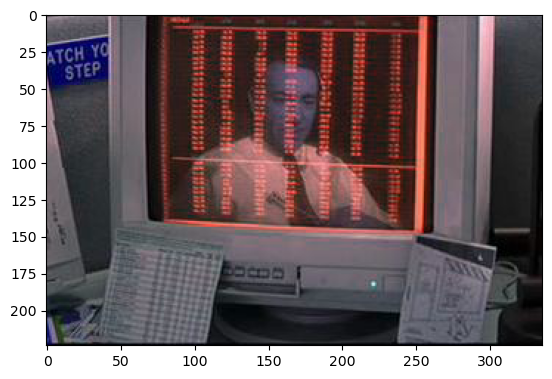

In [10]:
plt.imshow(frames[24])

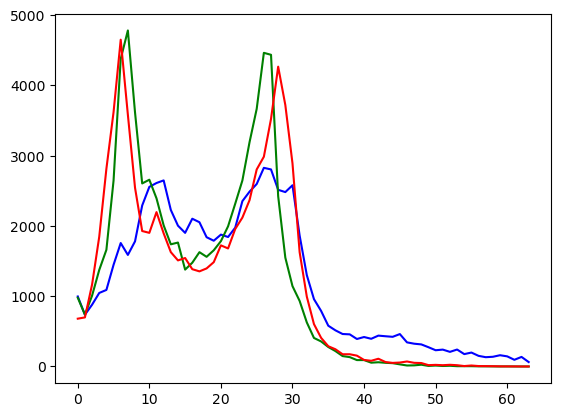

In [25]:
frame1= ICV_hist(frames[24],64)


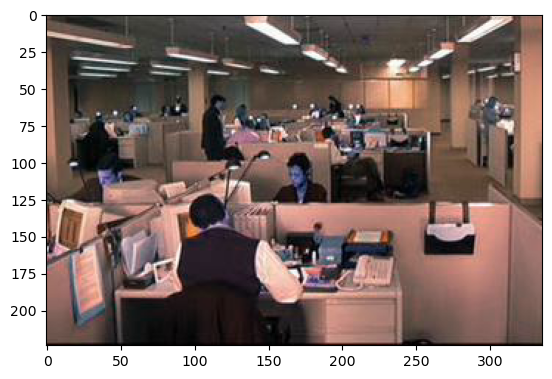

In [12]:
plt.imshow(frames[120])

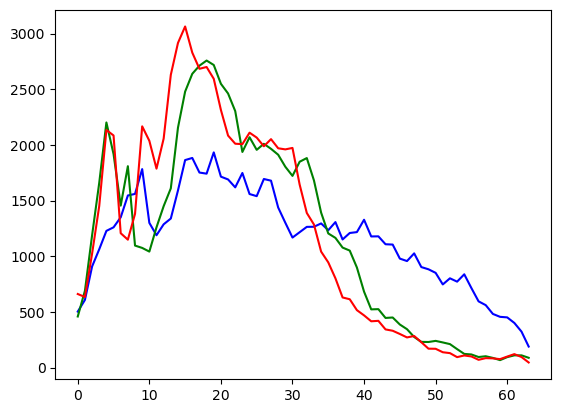

In [13]:
frame2 = ICV_hist(frames[120],64)

In [14]:
def hist_inter(hist1,hist2):
    intersection = (np.sum(np.minimum(hist1,hist2)))
    return intersection

In [15]:
hist_arr1 = []
for i in range(len(frames)-1):
    
    
    x = ICV_hist2(frames[i],64)
    y = ICV_hist2(frames[i+1],64)
    z = hist_inter(x,y)
    hist_arr1.append(z)
# print(hist_arr1)

    # print(y.dtype)

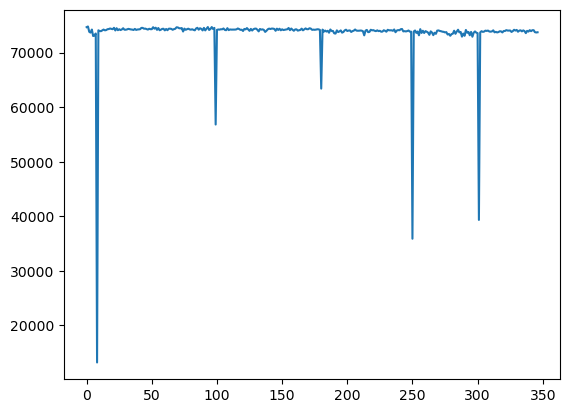

In [16]:
plt.plot(hist_arr1)

In [17]:
def hist_inter_norm(hist1,hist2):
    intersection = np.divide(np.sum(np.minimum(hist1,hist2)),np.sum(hist2))
    return intersection

In [18]:
hist_arr2 = []
for i in range(len(frames)-1):
    
    
    x = ICV_hist2(frames[i],64)
    y = ICV_hist2(frames[i+1],64)
    z = hist_inter_norm(x,y)
    hist_arr2.append(z)

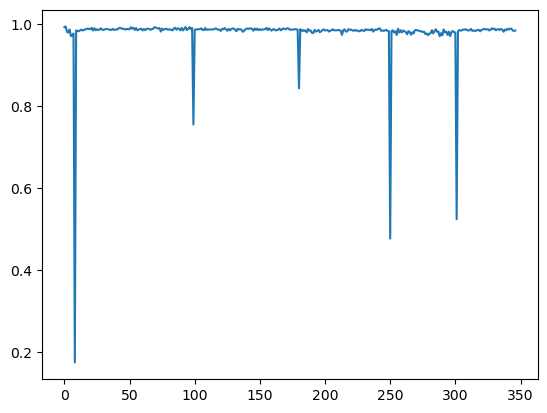

In [19]:
plt.plot(hist_arr2)

In [27]:
frame3 = ICV_hist2(frames[120],64)
frame4 = ICV_hist2(frames[121],64)
intersection = hist_inter_norm(frame3,frame4)
print(intersection)

0.9831738437001595


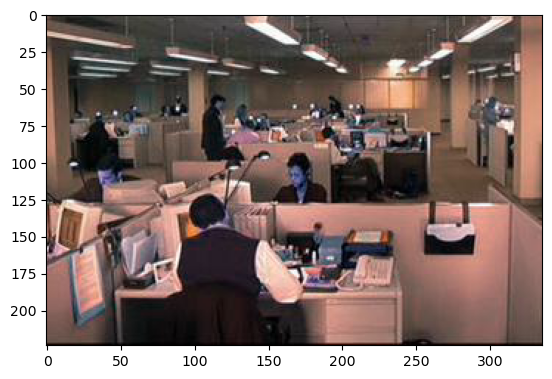

In [30]:
plt.imshow(frames[121])

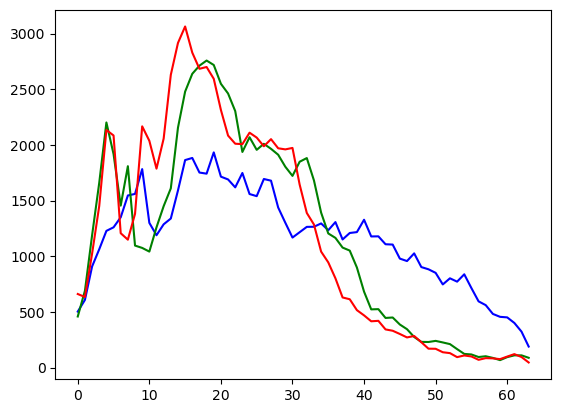

In [29]:
frame3 = ICV_hist(frames[120],64)

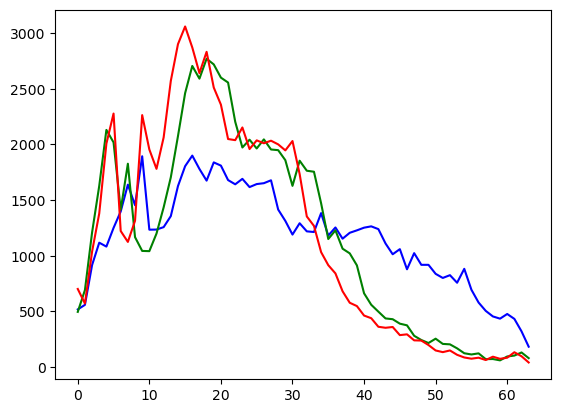

In [31]:
frame4 = ICV_hist(frames[121],64)